<a href="https://colab.research.google.com/github/MS1308/My-Projects/blob/main/AmazonStockLSTM-.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.layers import Dense, Activation, Dropout, LSTM
from keras.models import Sequential
import time #helper libraries

In [5]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
link = 'https://drive.google.com/open?id=1y394o-wiPqYPaWzVYTPRr8xpE_aM9621'

In [7]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='


1y394o-wiPqYPaWzVYTPRr8xpE_aM9621


In [8]:
import pandas as pd
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('AMZN.csv')
df3 = pd.read_csv('AMZN.csv')
# Dataset is now stored in a Pandas Dataframe

In [10]:
from keras.layers import Dense, Activation, Dropout # Changed import statement to reflect newer Keras version structure
from keras.layers import LSTM
from keras.models import Sequential
import time #helper libraries

In [11]:
df3 = df3.dropna(axis = "columns")

In [12]:
df3.head()

,Date,Open,High,Low,Adj Close,Volume,Close
0,1/4/2010,136.250000,136.610001,133.139999,133.899994,7599900,133.899994
1,1/5/2010,133.429993,135.479996,131.809998,134.690002,8851900,134.690002
2,1/6/2010,134.600006,134.729996,131.649994,132.250000,7178800,132.250000
3,1/7/2010,132.009995,132.320007,128.800003,130.000000,11030200,130.000000
4,1/8/2010,130.559998,133.679993,129.029999,133.520004,9830500,133.520004


In [13]:
import numpy as np

In [14]:
df_close = df3['Close']

In [15]:
df_close.shape

(2265,)

In [16]:
#Reshaping it
df_close = df_close.values.reshape(2265,1)


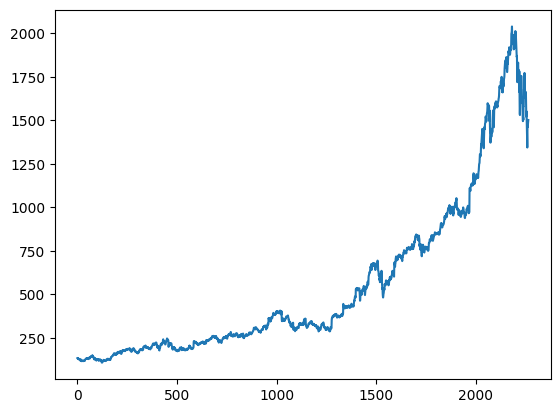

In [17]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#Ploting it
plt.plot(df_close)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
df_close = scaler.fit_transform(df_close)

In [18]:
train_size = int(len(df_close) * 0.80)
test_size = len(df_close) - train_size
train, test = df_close[0:train_size,:], df_close[train_size:len(df_close),:]
print(len(train), len(test))

1812 453


In [19]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1): #keep only similar value data if a data point is too far of the last one jump to the next value
	dataX, dataY = [], []       #put this in data x
	for i in range(len(dataset)-look_back-1): #let dataY have only output values
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [20]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [21]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [24]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    units=50,
    input_shape=(1, look_back), # Changed input_dim to input_shape
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    units=1))
model.add(Activation('relu'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
print ('compilation time : ', time.time() - start)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


compilation time :  0.054461002349853516


In [27]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    epochs=80, # Changed nb_epoch to epochs
    validation_split=0.05)

Epoch 1/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0159 - mae: 0.0899 - val_loss: 0.0713 - val_mae: 0.2663
Epoch 2/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0089 - mae: 0.0690 - val_loss: 0.0592 - val_mae: 0.2425
Epoch 3/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0081 - mae: 0.0693 - val_loss: 0.0582 - val_mae: 0.2405
Epoch 4/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0077 - mae: 0.0679 - val_loss: 0.0570 - val_mae: 0.2381
Epoch 5/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0081 - mae: 0.0696 - val_loss: 0.0572 - val_mae: 0.2383
Epoch 6/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0082 - mae: 0.0704 - val_loss: 0.0560 - val_mae: 0.2359
Epoch 7/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0078 - mae: 0.0683 - val_loss: 0.0568 - val_mae: 0.2376
Epoch 8/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0076 - mae: 0.0677 - val_loss: 0.0577 - val_mae: 0.2394
Epoch 9/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0074 - mae

In [30]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    epochs=40, # Changed nb_epoch to epochs
    validation_split=0.05)

Epoch 1/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.7054e-04 - mae: 0.0092 - val_loss: 3.6849e-05 - val_mae: 0.0047
Epoch 2/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.4138e-04 - mae: 0.0087 - val_loss: 3.8131e-05 - val_mae: 0.0048
Epoch 3/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.3170e-04 - mae: 0.0082 - val_loss: 2.6844e-05 - val_mae: 0.0038
Epoch 4/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5273e-04 - mae: 0.0085 - val_loss: 3.8753e-05 - val_mae: 0.0049
Epoch 5/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3103e-04 - mae: 0.0078 - val_loss: 7.9577e-05 - val_mae: 0.0079
Epoch 6/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7503e-04 - mae: 0.0098 - val_loss: 3.3986e-05 - val_mae: 0.0044
Epoch 7/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.2636e-04 - mae: 0.0077 - val_loss: 7.8909e-05 - val_mae: 0.0078
Epoch 8/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5519e-04 - mae: 0.0088 - val_loss: 3.9342e-05 - val_mae: 0.0050
Epoc

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step


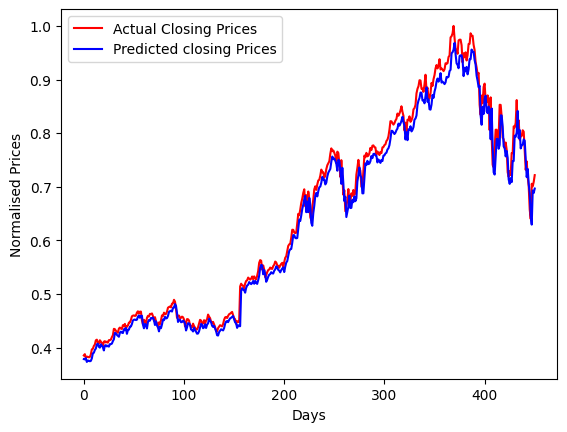

In [31]:
import matplotlib.pyplot as plt
predicted_stateful = model.predict(testX)
plt.plot(testY, color = 'red',label = 'Actual Closing Prices')
plt.plot(predicted_stateful.flatten(), color = 'blue', label  = 'Predicted closing Prices')
plt.xlabel('Days')
plt.ylabel('Normalised Prices')
plt.legend(loc='best')
plt.show()


In [33]:
mae = model.evaluate(trainX,
    trainY,
    batch_size=128,verbose=1)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0696e-05 - mae: 0.0058 
